# Checking the difference in the prediction, number of times one experiment over and under predicts

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon

In [2]:
from src.RQ1_forecast import *

In [3]:
num_samples = 100

In [4]:
data_address1 = '/home/dev/deepts/experiments/deep_ar/traffic/1A'

# metric section

In [5]:
# loop through all the runs in the results folder and read the metric dataframe
metrics_list1 = read_csv_result('metrics.csv', data_address1)

101it [00:00, 28792.54it/s]
100%|#############| 99/99 [00:04<00:00, 23.29it/s]


In [6]:
# read the second results
metrics_list2 = read_csv_result('metrics.csv', data_address2)

101it [00:00, 31215.44it/s]
100%|###########| 100/100 [00:04<00:00, 24.70it/s]


In [7]:
def sort_metric_df(my_metrics_df):
    my_metrics_df.sort_values(by=['item_id', 'Unnamed: 0'], inplace=True)
    my_metrics_df.reset_index(drop=True, inplace=True)
    return my_metrics_df

In [8]:
def sort_metric_list(my_metric_list):
    for my_metric_df in my_metric_list:
        my_metric_df = sort_metric_df(my_metric_df)

In [9]:
sort_metric_list(metrics_list1)
sort_metric_list(metrics_list2)


In [10]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,201.236165,270.903564,235.0,9.791667,8.031874,1.405357,2.867487,0.752681,NaN,30.065092,251.480861,0.708333,270.903529,0.958333,88.063585,1.000000
1,321,0.0,115.575724,196.189148,264.0,11.000000,8.026991,1.018383,1.959425,0.691471,NaN,25.286467,155.523003,0.541667,196.189157,0.791667,114.747170,0.875000
2,642,0.0,163.393504,253.373138,284.0,11.833333,8.025109,1.315523,1.711095,0.723348,NaN,30.185729,208.674636,0.750000,253.373154,0.916667,118.474028,0.916667
3,963,0.0,122.346710,226.938919,189.0,7.875000,8.024132,1.178419,2.296112,0.849825,NaN,30.549057,260.155552,0.875000,226.938930,0.875000,60.929320,1.000000
4,1284,0.0,20.895597,73.803986,166.0,6.916667,8.019890,0.383442,0.708178,0.467564,NaN,9.809795,39.441866,0.250000,73.803988,0.416667,65.994525,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,962,320.0,41859.359375,4328.768555,74254.0,3093.916667,287.494114,0.627371,0.060022,0.062306,NaN,4.459930,2003.600293,0.000000,4328.768799,0.041667,1190.268213,0.583333
2243,1283,320.0,131098.572917,8168.035156,78719.0,3279.958333,287.257349,1.184773,0.103887,0.110046,NaN,18.937011,2697.404932,0.000000,8168.035156,0.000000,5425.503662,0.166667
2244,1604,320.0,59728.197917,5092.566406,74298.0,3095.750000,287.146950,0.738961,0.066275,0.069216,NaN,8.732626,2078.027686,0.000000,5092.566406,0.083333,2552.043018,0.500000
2245,1925,320.0,34865.544271,4130.916016,68217.0,2842.375000,287.030085,0.599664,0.059352,0.061461,NaN,2.704289,1796.827295,0.000000,4130.915771,0.000000,675.019922,0.833333


In [11]:
metrics_exp_list = [metrics_list1, metrics_list2]

In [12]:
metrics_exp_np = get_metric_list_np(metrics_exp_list)
metrics_exp_np.shape

(2, 2247, 18)

In [13]:
metrics_exp_np.std(axis=0).shape

(2247, 18)

In [14]:
pd.DataFrame(metrics_exp_np.std(axis=0))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,7.621816,4.510239,0.0,0.0,0.0,0.023398,0.037434,0.005349,NaN,3.580279,29.469706,0.041667,4.510224,0.020833,0.561327,0.000000
1,0.0,0.0,15.342921,22.563965,0.0,0.0,0.0,0.117125,0.267139,0.047626,NaN,1.638195,24.131901,0.104167,22.563969,0.041667,3.877556,0.000000
2,0.0,0.0,17.600978,18.717453,0.0,0.0,0.0,0.097182,0.143704,0.032851,NaN,0.577056,10.005243,0.041667,18.717445,0.000000,0.882188,0.020833
3,0.0,0.0,32.269618,26.661339,0.0,0.0,0.0,0.138444,0.263085,0.040468,NaN,1.039504,6.884342,0.041667,26.661348,0.041667,11.304057,0.000000
4,0.0,0.0,1.040717,1.589451,0.0,0.0,0.0,0.008258,0.006801,0.004487,NaN,0.099583,0.266174,0.020833,1.589451,0.020833,2.129812,0.020833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,0.0,0.0,16191.875000,1300.574341,0.0,0.0,0.0,0.188493,0.018963,0.020228,NaN,1.345091,481.242432,0.000000,1300.574463,0.229167,105.409546,0.208333
2243,0.0,0.0,50188.283854,2430.705444,0.0,0.0,0.0,0.352574,0.031542,0.034000,NaN,7.329710,442.752563,0.000000,2430.705444,0.041667,2025.660962,0.333333
2244,0.0,0.0,21524.544271,1175.988403,0.0,0.0,0.0,0.170643,0.014865,0.016468,NaN,3.206070,455.130078,0.020833,1175.988403,0.250000,576.284521,0.229167
2245,0.0,0.0,14492.832682,1230.470825,0.0,0.0,0.0,0.178621,0.017100,0.018224,NaN,0.543239,372.122656,0.000000,1230.470703,0.270833,250.664429,0.083333


In [15]:
different_indexes_list = get_different_idx(metrics_list1, metrics_list2)

In [16]:
len(different_indexes_list)

100

# Forecast section

In [6]:
# read the forecast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1, n_files=100)
# forcast_list2 = read_csv_result('forecasts.csv', data_address2, n_files=100)

101it [00:00, 25498.06it/s]
100%|###########| 100/100 [08:03<00:00,  4.84s/it]


In [7]:
len(forcast_list1)

100

In [9]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1)
# sorted_forcast_list2 = get_sorted_csv(forcast_list2)

In [10]:
sorted_forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2016-08-07 20:00:00,0.0393,0.040485,0.042979,0.042654,0.041472,0.041253,0.039513,...,0.044147,0.037549,0.043552,0.041992,0.034868,0.042852,0,0.040731,0.004881,0.105208
1,1,321,2016-08-07 20:00:00,0.0310,0.030655,0.031230,0.032282,0.029255,0.033063,0.029272,...,0.030736,0.029596,0.031111,0.032282,0.030750,0.030269,0,0.030209,0.001625,0.136953
2,1,642,2016-08-07 20:00:00,0.0471,0.049798,0.050496,0.050789,0.044720,0.048073,0.034183,...,0.046641,0.049411,0.048202,0.046436,0.048426,0.036609,0,0.047901,0.004543,0.157920
3,1,0,2016-08-07 21:00:00,0.0187,0.024300,0.031618,0.029440,0.027838,0.029763,0.027973,...,0.027550,0.026036,0.031420,0.027915,0.025080,0.031216,0,0.029303,0.005588,0.096130
4,1,321,2016-08-07 21:00:00,0.0241,0.024318,0.024698,0.026242,0.025382,0.027615,0.024149,...,0.025098,0.026378,0.020888,0.028369,0.025074,0.026742,0,0.024796,0.002424,0.113530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144811,1,5777,2016-08-14 17:00:00,0.0554,0.049221,0.053822,0.047541,0.045803,0.051130,0.047316,...,0.047934,0.047876,0.050288,0.047390,0.050109,0.043135,320,0.046416,0.009417,0.123936
144812,1,5456,2016-08-14 18:00:00,0.0417,0.045593,0.041676,0.043625,0.040393,0.043151,0.042634,...,0.040751,0.046576,0.048974,0.038728,0.037804,0.042496,320,0.041266,0.006405,0.145028
144813,1,5777,2016-08-14 18:00:00,0.0591,0.047673,0.048443,0.045737,0.046016,0.048390,0.052567,...,0.052943,0.046414,0.047133,0.044616,0.045783,0.045246,320,0.044966,0.007277,0.112804
144814,1,5456,2016-08-14 19:00:00,0.0381,0.046589,0.045142,0.043658,0.047950,0.046403,0.045840,...,0.045810,0.040543,0.049460,0.045128,0.042490,0.044076,320,0.045104,0.006199,0.113975


In [11]:
target_forcast_series = get_forcast_target(forcast_list1)

In [12]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

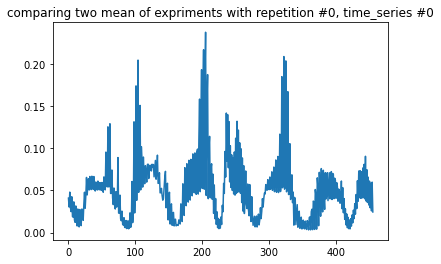

In [14]:
# plot mean of only one time series
rep_no = 0
plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot()
# ts_list2[rep_no]['mean'].plot()

## We want to compare the number of time points on experiment underpredict. 
Question is are experiments with worst MAPE, underpredict most of the time?

In [38]:
# question: is the worse one always underpredict?
# we need to use compare means, but I need to change the function
# experiment A
expA_worst_compare = (sorted_forcast_list1[37]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_best_compare = (sorted_forcast_list1[60]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_highest_compare = (sorted_forcast_list1[9]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_lowest_compare = (sorted_forcast_list1[22]['mean'] < sorted_forcast_list1[0]['target']).value_counts()

# # experiment B
# expB_worst_compare = (sorted_forcast_list2[63]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_best_compare = (sorted_forcast_list2[68]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_highest_compare = (sorted_forcast_list2[8]['mean'] < sorted_forcast_list2[0]['target']).value_counts()

In [39]:
# outputs the proportion of true experiences over all the experiences
def compare_two_series(seriesTrue, seriesFalse):
    return seriesTrue/(seriesTrue + seriesFalse)

underpred_A_best = compare_two_series(expA_best_compare[True], expA_best_compare[False])
underpred_A_worst = compare_two_series(expA_worst_compare[True], expA_worst_compare[False])
underpred_A_highest = compare_two_series(expA_highest_compare[True], expA_highest_compare[False])
underpred_A_lowest = compare_two_series(expA_lowest_compare[True], expA_lowest_compare[False])


print(f'percentage of underprediction of worst repetition for experiment A = {underpred_A_worst}')
print(f'percentage of underprediction of best repetition for experiment A = {underpred_A_best}')
print(f'percentage of underprediction of highest repetition for experiment A = {underpred_A_highest}')
print(f'percentage of underprediction of lowest repetition for experiment A = {underpred_A_lowest}')




percentage of underprediction of worst repetition for experiment A = 0.6673571980996575
percentage of underprediction of best repetition for experiment A = 0.7584659153684675
percentage of underprediction of highest repetition for experiment A = 0.16298613412882554
percentage of underprediction of lowest repetition for experiment A = 0.8781833499060877


(0.04, 0.24)

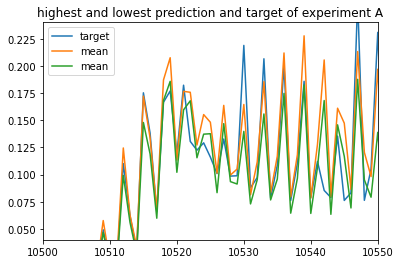

In [37]:
plt.title('highest and lowest prediction and target of experiment A')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[9]['mean'].plot(legend=True)
sorted_forcast_list1[22]['mean'].plot(legend=True)
plt.xlim([10500,10550])
plt.ylim([0.04,0.24])

In [19]:
# find the one with the highest prediction
# get_highest_prediction_id(sorted_forcast_list1, high_flag=True)
get_highest_prediction_id(sorted_forcast_list1, high_flag=False)

22

In [27]:
# find max difference between each experiments with itself and also combined
# combined_forecast_list = sorted_forcast_list1 + sorted_forcast_list2
# combined_max_tuple, _ = get_max_difference_pair(combined_forecast_list)
expA_max_tuple, _ = get_max_difference_pair(sorted_forcast_list1)
# expB_max_tuple, _ = get_max_difference_pair(sorted_forcast_list2)

In [28]:
print(f'the most different tuples of experiment A is: {expA_max_tuple}')
# print(f'the most different tuples of experiment B is: {expB_max_tuple}')
# print(f'the most different tuples of Combined experiments is: {combined_max_tuple}')

the most different tuples of experiment A is: (9, 19)


## find the tuples for all the time series (it takes much time)

In [119]:
# get all the 321 pairs here
lower_pair_list = []
higher_pair_list = []

for i in range(321):
    # lower values
    higher_flag = False
    idx_dif, mx_dif, l_list = get_max_diff_id(i, sorted_forcast_list1, sorted_forcast_list2, higher_flag)
    lower_pair_list.append(idx_dif)
    break
    # higher values
    # higher_flag = True
    # idx_dif, mx_dif, l_list = get_max_diff_id(i, sorted_forcast_list1, sorted_forcast_list2, higher_flag)
    # higher_pair_list.append(idx_dif)


In [ ]:
# calculating the most appeared pairs
import statistics 
from statistics import mode 

mode(lower_pair_list), mode(higher_pair_list)

## take the average of experiment A and B and plot them
the reults show that after running 100 times, the average of results are converging.

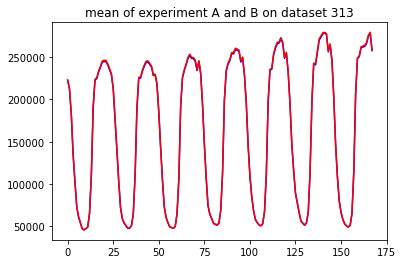

In [124]:
ts_no = 313

# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)


means_A = np.zeros((len(ts_list1) , ts_list1[0]['mean'].shape[0]))
means_B = np.zeros((len(ts_list2) , ts_list2[0]['mean'].shape[0]))


for idx, ts_df1 in enumerate(ts_list1):
    means_A[idx] = ts_df1['mean'].to_numpy()
for idx, ts_df2 in enumerate(ts_list2):
    means_B[idx] = ts_df2['mean'].to_numpy()

mean_means_A = means_A.mean(axis=0)
mean_means_B = means_B.mean(axis=0)

plt.title(f'mean of experiment A and B on dataset {ts_no}')
plt.plot(mean_means_A, color='blue')
plt.plot(mean_means_B, color='red')
# plt.plot(ts_list1[0]['target'].to_numpy())
# mean1 = ts_list1[0]['mean'].to_numpy()
# mean1.shape

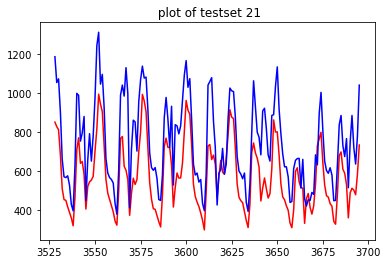

In [118]:
ts_no = 21
# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)

plt.title(f' plot of testset {ts_no}')
ts_list2[63]['mean'].plot(color='r')
# ts_list2[50]['mean'].plot(color='g')
ts_list2[63]['target'].plot(color='b')
